# Start Coding

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
# load teh fasion mnist dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

Label:9

Image PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1  

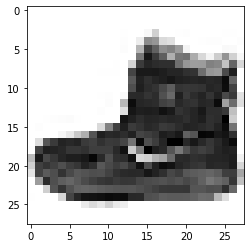

In [4]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
np.set_printoptions(linewidth=320)

print(f'Label:{training_labels[index]}')
print(f'\nImage PIXEL ARRAY:\n {training_images[index]}')

# visualize
plt.imshow(training_images[index],cmap="Greys")

In [5]:
# normalize the pixel vlues of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [6]:
# build the clasification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [7]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# feed the inputs to a softmax activation funciton
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4940 - accuracy: 0.8278
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3728 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3350 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3114 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2938 - accuracy: 0.8924


In [9]:
# eveluate the model on unseen data
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3478 - accuracy: 0.8744


[0.3478001058101654, 0.8744000196456909]

# Exploration Exercises

## Exercise 1:

In [10]:
classifications = model.predict(test_images)

print(classifications[0])

[2.0547590e-07 7.9541752e-07 6.8454646e-08 1.1511521e-07 4.0817332e-07 1.7633040e-02 3.1206240e-05 4.6865579e-02 2.9537824e-04 9.3517315e-01]


In [11]:
print(test_labels[0])

9


In [12]:
np.argmax(classifications[0])

9

# Exercise 2:

### Increase to 1024 Neurons -- What's the impact?

In [13]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images, test_images = training_images / 255.0, test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
             loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs = 5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2044
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0811
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0535
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0388
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0664
[3.6655906e-10 7.2639184e-09 1.0727579e-06 1.0271653e-05 2.4568984e-11 1.0140832e-08 1.7178228e-12 9.9998713e-01 9.4903257e-08 1.4627566e-06]
7


# Exercise 3:

### What would happen if you remove the Flatten() layer. Why do you think that's the case?

In [18]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images , test_images = training_images / 255.0, test_images / 255.0

model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer="adam",
             loss = "sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs=2)

model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

print(classification[0])
print(test_labels[0])

Epoch 1/2


ValueError: in user code:

    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


# Exercise 4:

In [19]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images, test_images = training_images / 255.0, test_images / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(optimizer=tf.optimizers.Adam(),
             loss="sparse_categorical_crossentropy")

model.fit(training_images, training_labels, epochs = 5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\burak\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\burak\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\burak\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\burak\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\burak\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\burak\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\burak\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "C:\Users\burak\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "C:\Users\burak\anaconda3\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\burak\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\burak\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
      ret = callback()
    File "C:\Users\burak\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
      self.run()
    File "C:\Users\burak\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
      yielded = self.gen.send(value)
    File "C:\Users\burak\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\burak\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\burak\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\burak\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\burak\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "C:\Users\burak\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
      yielded = next(result)
    File "C:\Users\burak\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\burak\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\burak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2877, in run_cell
      result = self._run_cell(
    File "C:\Users\burak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2923, in _run_cell
      return runner(coro)
    File "C:\Users\burak\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\burak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3146, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\burak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\burak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-19-641e6e5a190a>", line 16, in <module>
      model.fit(training_images, training_labels, epochs = 5)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\losses.py", line 1862, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\burak\anaconda3\lib\site-packages\keras\backend.py", line 5202, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 9 6 9 4 0 7 0 4 6 8 9 9 8 8 2 2 4 8 3 4 9 2 3 3 3 5 5 1 8 6 9 6
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_97914]

# Exercises 7:

In [20]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 2.5541
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3230
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2812
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2821
Epoch 5/5
313/313 [==============================] - 3s 7ms/step - loss: 0.3016
[1.7583441e-31 5.7705916e-20 1.2160600e-18 2.0891917e-17 2.1281137e-33 5.3913380e-26 0.0000000e+00 1.0000000e+00 5.5096887e-31 2.4469119e-19]
7


# Exercises 8:

In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get("accuracy") >= 0.95):
            print("\nReached %95 accucacy so canceling training")
            self.model.stop_training = True
            
callbacks = myCallback()
mnist = tf.keras.datasets.mnist
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(training_images,training_labels,epochs=5,callbacks=[callbacks])

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2010 - accuracy: 0.9407
Epoch 2/5
1874/1875 [============================>.] - ETA: 0s - loss: 0.0802 - accuracy: 0.9758
Reached %95 accucacy so canceling training
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0802 - accuracy: 0.9758
